# exlporatory data analysis on IRIS-dataset

# importing libraries and read data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url= 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
data=pd.read_csv(url)

# understanding the data set

In [ ]:
iris=pd.DataFrame(data)
print("the iris data set is:\n",iris.head(5))
print('\n******************************************')
print('the number of rows and columns in the iris data set are',iris.shape,'respectively')
print("\n********************************************")
print('the details of the iris data set\n',iris.info)
print("\n********************************************")
print('the statistical summary of the iris data set\n',iris.describe)
print("\n********************************************")
print('name of the columns are :',list(iris.columns))

the iris data set is:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

******************************************
the number of rows and columns in the iris data set are (150, 5) respectively

********************************************
the details of the iris data set
 <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             

checking missing value

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

checking distribution

In [ ]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Data visualization

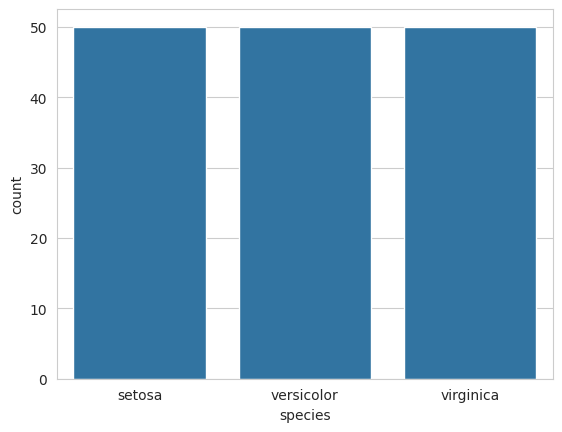

In [ ]:
sns.countplot(x='species',data=iris)
plt.show()

the data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50).

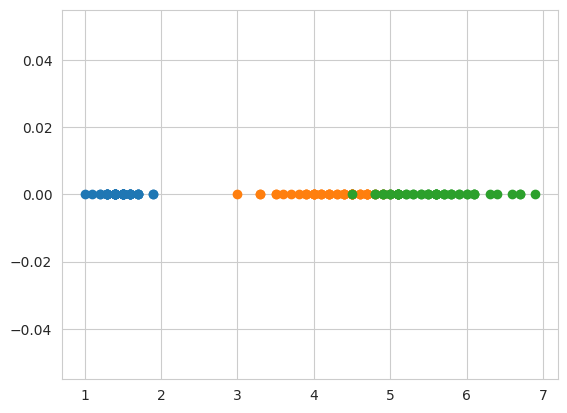

In [ ]:
iris_setosa=iris.loc[iris['species']=='setosa']
iris_virginica=iris.loc[iris['species']=='virginica']
iris_versicolor=iris.loc[iris['species']=='versicolor']

plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']),'o')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']),'o')
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']),'o')

plt.show()

observations

Green points are Virginica, orange points are Versicolor and blue points are Setosa

Virginica and Versicolor are overlapping

1D Scatter are very hard to read and understand

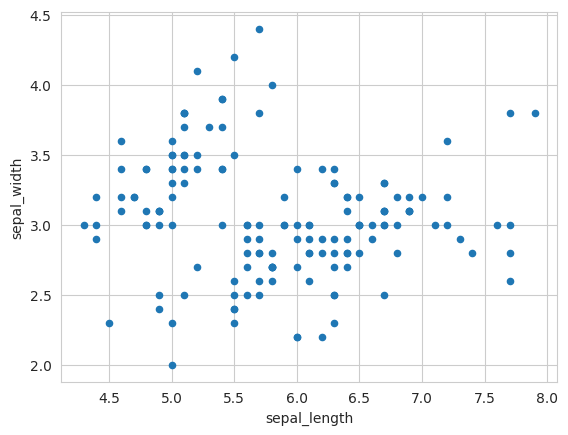

In [ ]:

iris.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

 unable to understand which is setosa or versicolor or virginica flower because all points are in same colour. It cannot make much sense out it

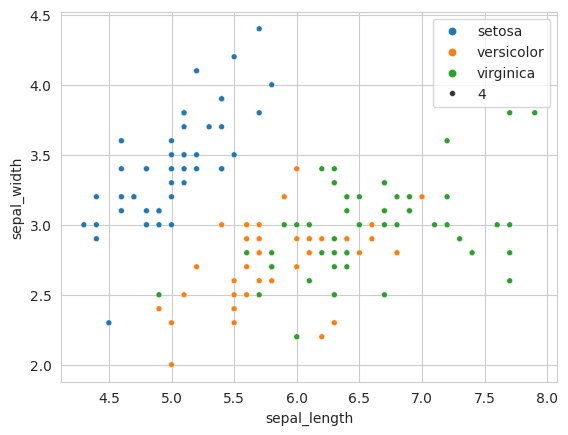

In [ ]:
sns.set_style("whitegrid");
sns.scatterplot(iris,x="sepal_length",y="sepal_width",hue="species",size=4)
plt.legend()
plt.show()

observation

Blue points can be easily separated from red and green by drawing a line.

But red and green data points cannot be easily separated.

Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
if (3<sepal_length<5.8) and 2.3<sepal_width<4.5: setosa

Separating Versicolor from Viginica is much harder as they have considerable overlap.

3-D scatterplot

In [ ]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',color='species')
fig.show()

pair plot

Let’s plot all the column’s relationships using a pairplot. It can be used for multivariate analysis.

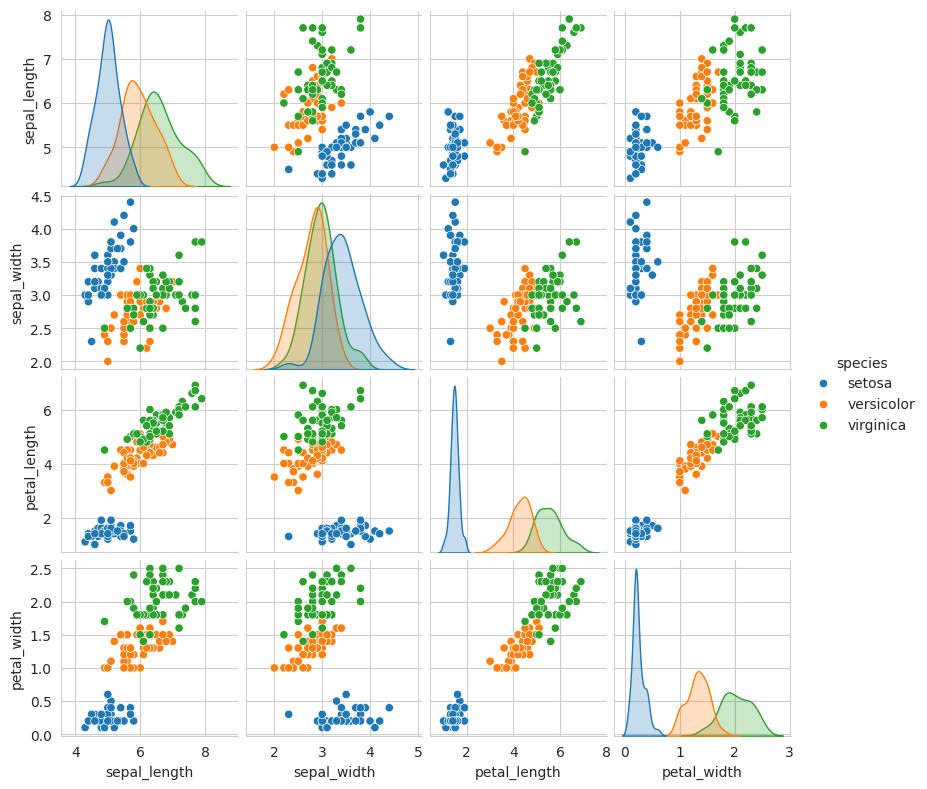

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species",height=2);
plt.show()

Observation

petal length and petal width are the most useful features to identify various flower types.

While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).

We can find “lines” and “if-else” conditions to build a simple model to classify the flower types.

histogram

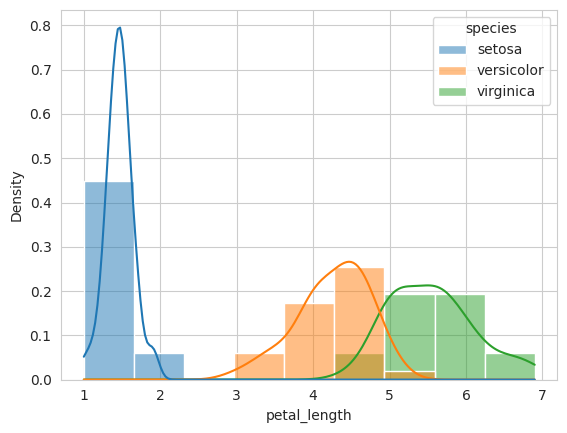

In [ ]:
sns.histplot(iris,x="petal_length",hue="species",kde=True,stat="density")
plt.show()

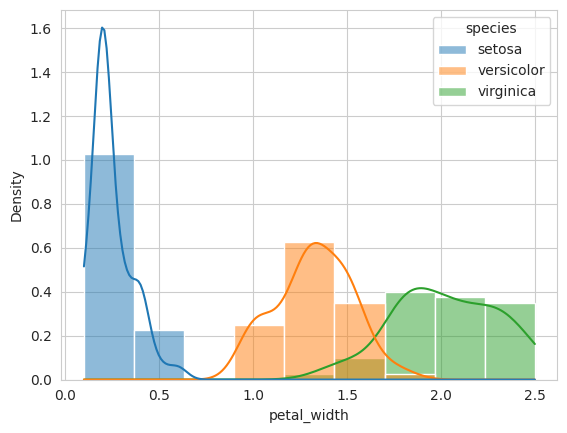

In [ ]:
sns.histplot(iris,x="petal_width",hue="species",kde=True,stat="density")
plt.show()

Observation

As we compare petal length and petal width then petal length the setosa are better separable than using patel width

There is overlap between vericolor and virginca

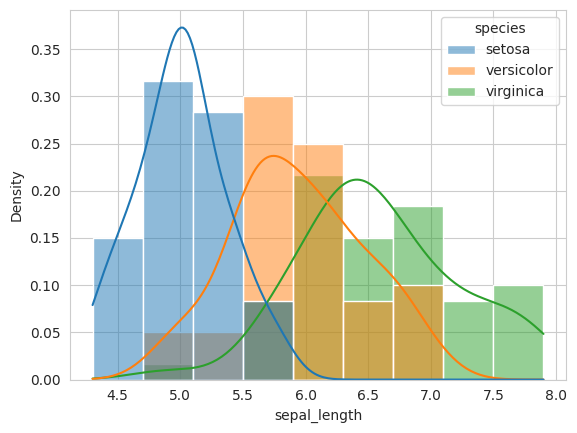

In [ ]:
sns.histplot(iris,x="sepal_length",hue="species",kde=True,stat="density")
plt.show()

Observation
Here we can’t separate any class because all of them are overlapped
From above observations we can say that Sapel length is worst than Patel length and Patel width

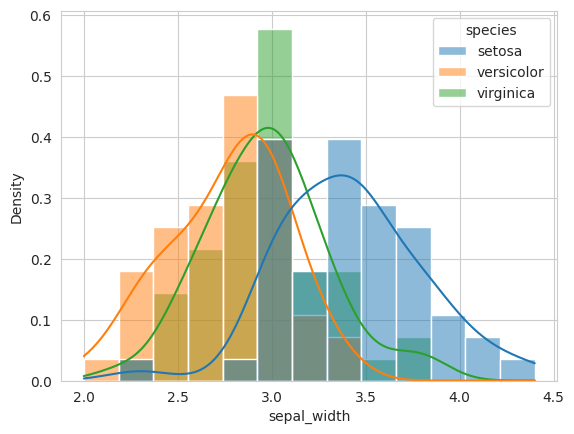

In [ ]:
sns.histplot(iris,x="sepal_width",hue="species",kde=True,stat="density")
plt.show()


Observation

And as we can see virginica and versicolor are fully overlapped.



Data Insights:

The pdf curve of Iris Setosa ends roughly at 2.1

If petal length < 2.1, then species is Iris Setosa

The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8

If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor

If petal length > 4.8 then species is Iris Virginica


# Calculating PDF Points

In [ ]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)

In [ ]:
counts[1]/sum(counts)

0.02000000000000003

Prrinting the counts for histogram
 [0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
Sum of count is
 11.11111111111111
Printing Edges of bins 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is as followes  
 [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


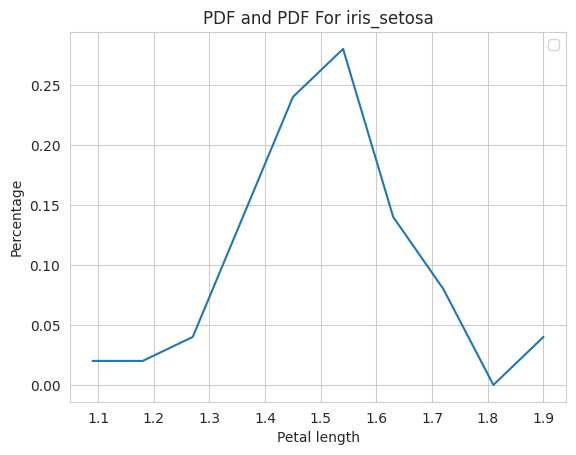

In [ ]:
print("Prrinting the counts for histogram\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))
print("Printing Edges of bins \n",bin_edges)
print("PDF is as followes  \n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF and PDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)

# Calculating CDF Points

CDF Is as followes
 [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


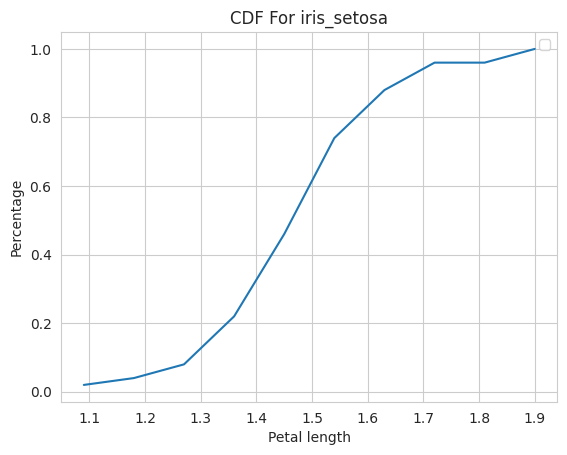

In [ ]:
cdf = np.cumsum(pdf)
print("CDF Is as followes\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.plot(bin_edges[1:],cdf)

In [ ]:
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 0.96, 1.  ])

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


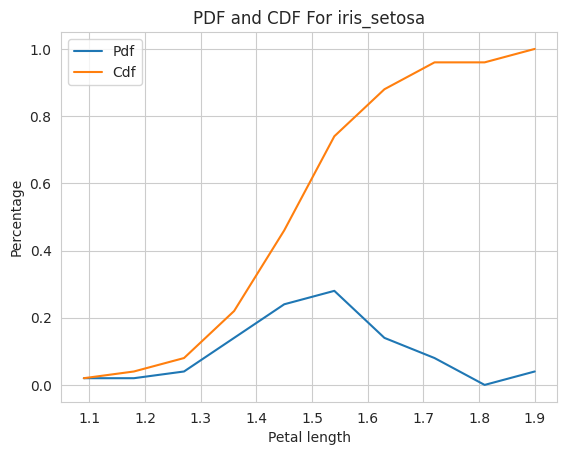

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

# PDF and CDF For all species

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


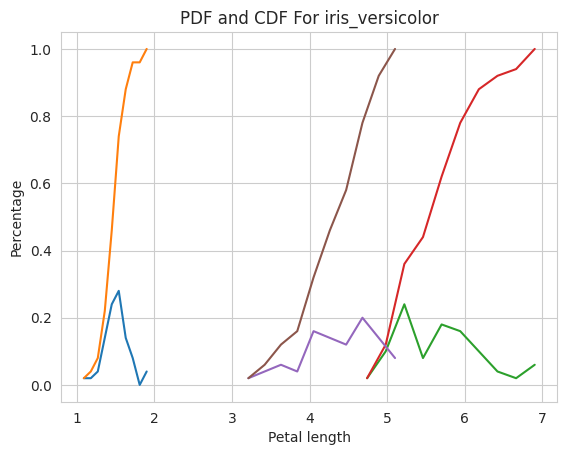

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

# Mean, Variance, Std-deviation

In [ ]:
#Mean, Variance, Std-deviation,
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


# Median, Quantiles, Percentiles, IQR.

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602
